# Haplotype clustering demo

This notebook demonstrates how to use the haplotype clustering utilities.

In [2]:
%run hapclust_utils.ipynb

## Setup data

In [4]:
callset = h5py.File('../data/ag1000g.phase1.AR3.1.haplotypes.specific_regions.2L_2358158_2431617.h5',
                    mode='r')
region_vgsc = SeqFeature('2L', 2358158, 2431617)
genotypes = allel.GenotypeArray(callset['2L/calldata/genotype'])
haplotypes = genotypes.to_haplotypes()
pos = allel.SortedIndex(callset['2L/variants/POS'])
loc = pos.locate_range(region_vgsc.start, region_vgsc.end)
h_vgsc = haplotypes[loc]
pos_995S = 2422651
pos_995F = 2422652
loc_995S = haplotypes[pos.locate_key(pos_995S)] == 1
loc_995F = haplotypes[pos.locate_key(pos_995F)] == 1
h_vgsc_995F = h_vgsc.compress(loc_995F, axis=1)
h_vgsc_995S = h_vgsc.compress(loc_995S, axis=1)

## Plot plot plot...

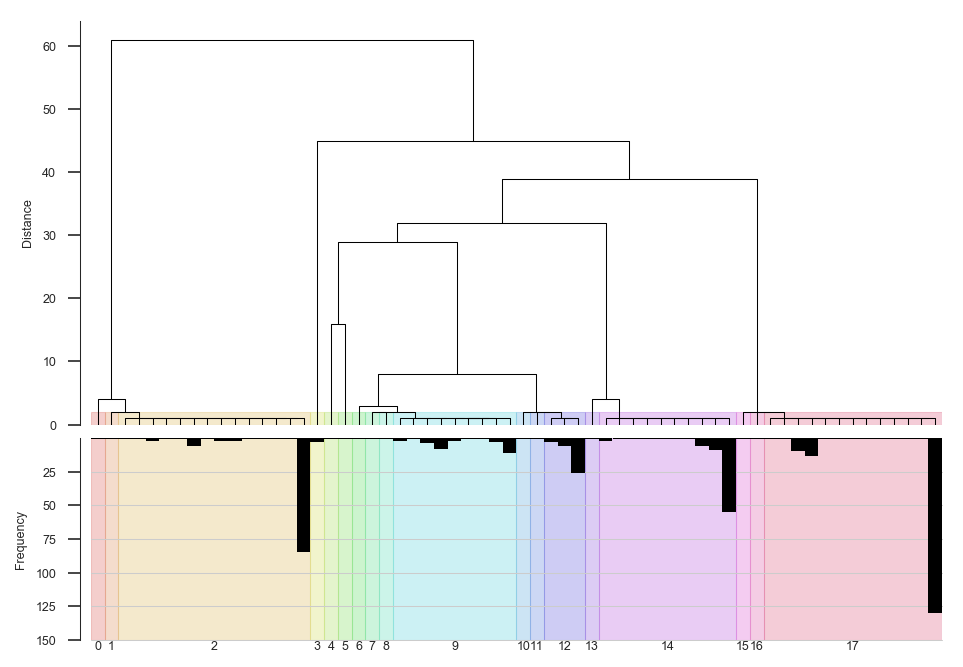

In [3]:
# Default plot... 
# cuts the tree at height 2 (so max distance within each cluster is 1)...
# highlights all clusters...
# labels all clusters.
fig_haplotypes_clustered(h_vgsc_995S, dpi=150);

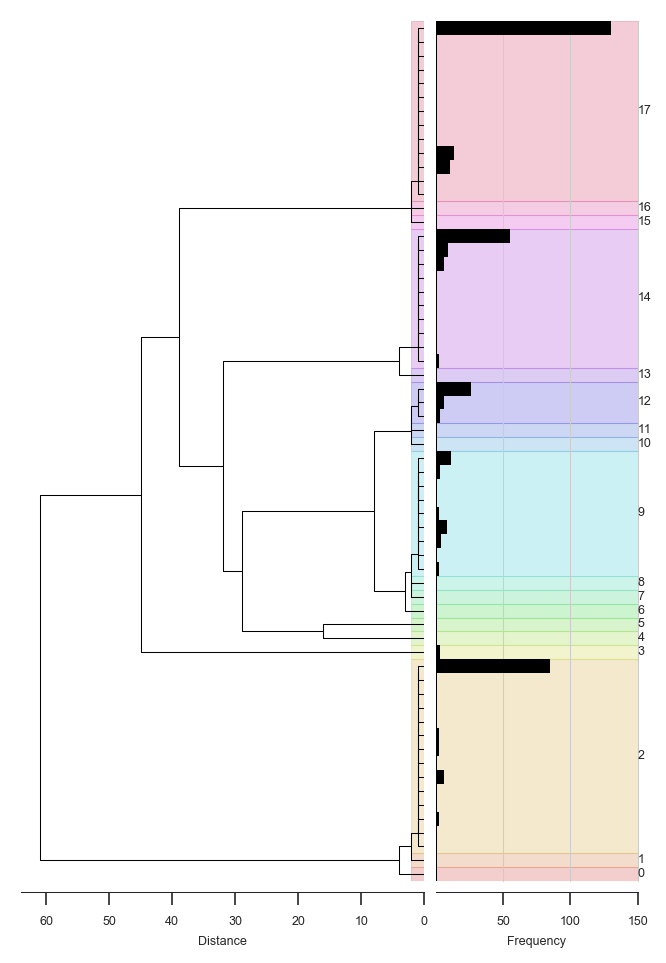

In [4]:
# Change the orientation...
fig_haplotypes_clustered(h_vgsc_995S, orientation='left', dpi=150);

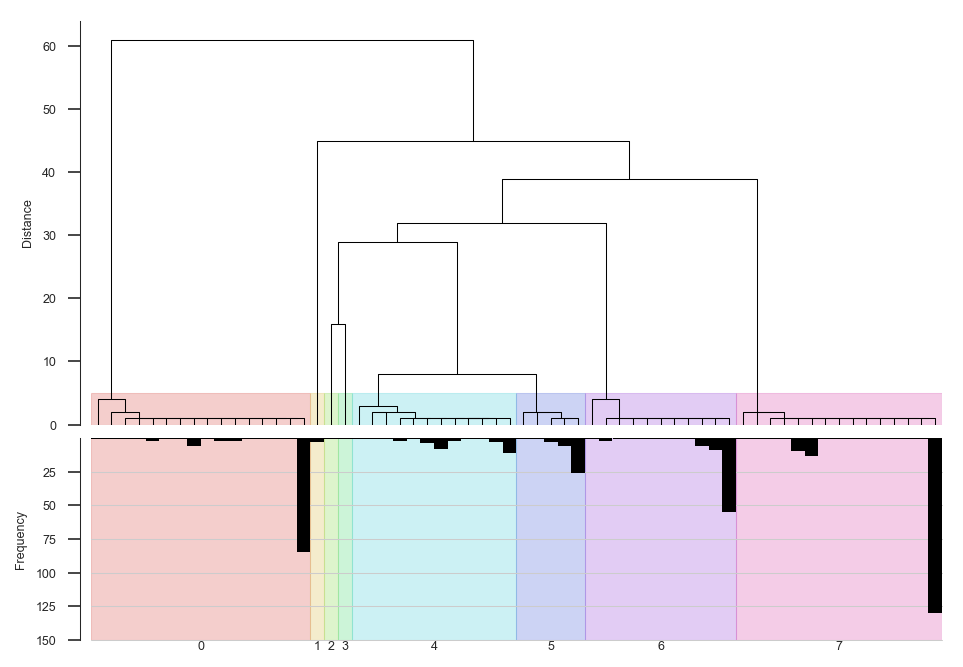

In [5]:
# Try a different cut height...
fig_haplotypes_clustered(h_vgsc_995S, cut_height=5, dpi=150);

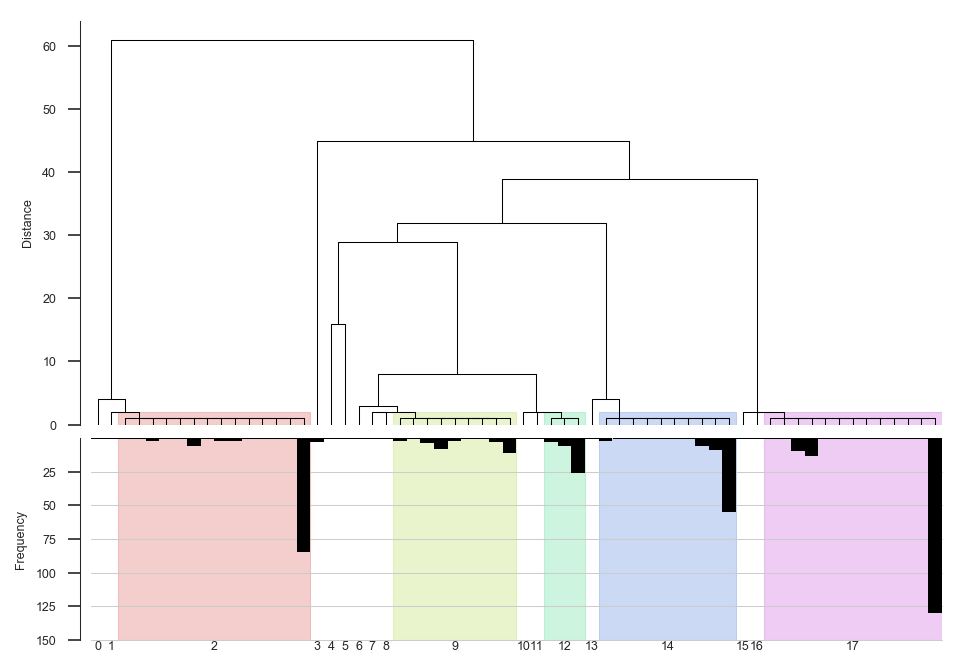

In [6]:
# Choose to highlight only clusters above a certain size...
fig_haplotypes_clustered(h_vgsc_995S, dpi=150, highlight_clusters=5);

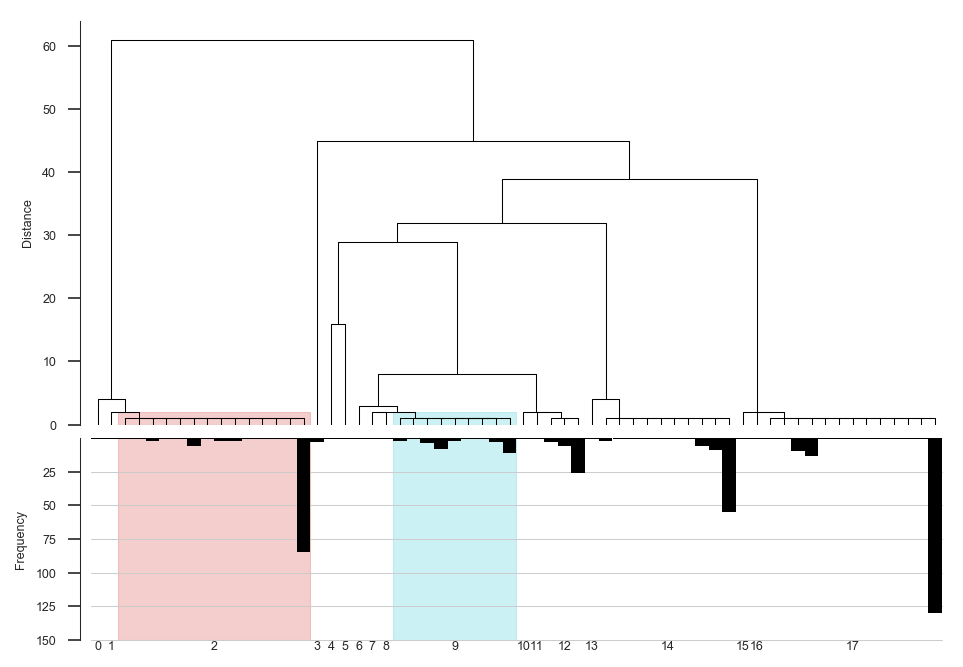

In [7]:
# Manually choose which clusters to highlight...
fig_haplotypes_clustered(h_vgsc_995S, dpi=150, highlight_clusters=[2, 9]);

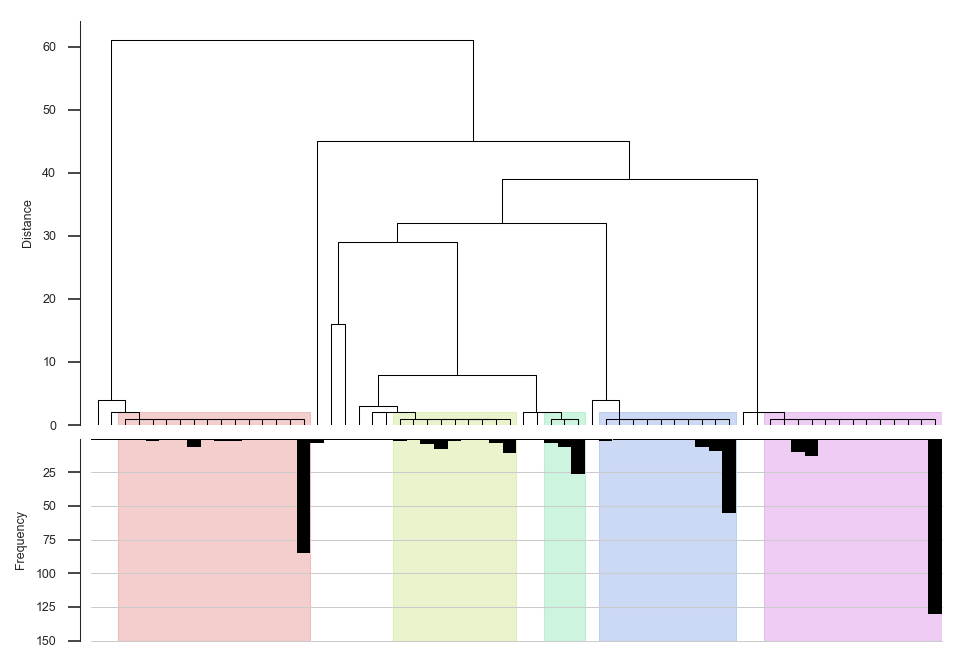

In [8]:
# Turn off cluster labels...
fig_haplotypes_clustered(h_vgsc_995S, dpi=150, highlight_clusters=5, label_clusters=False);

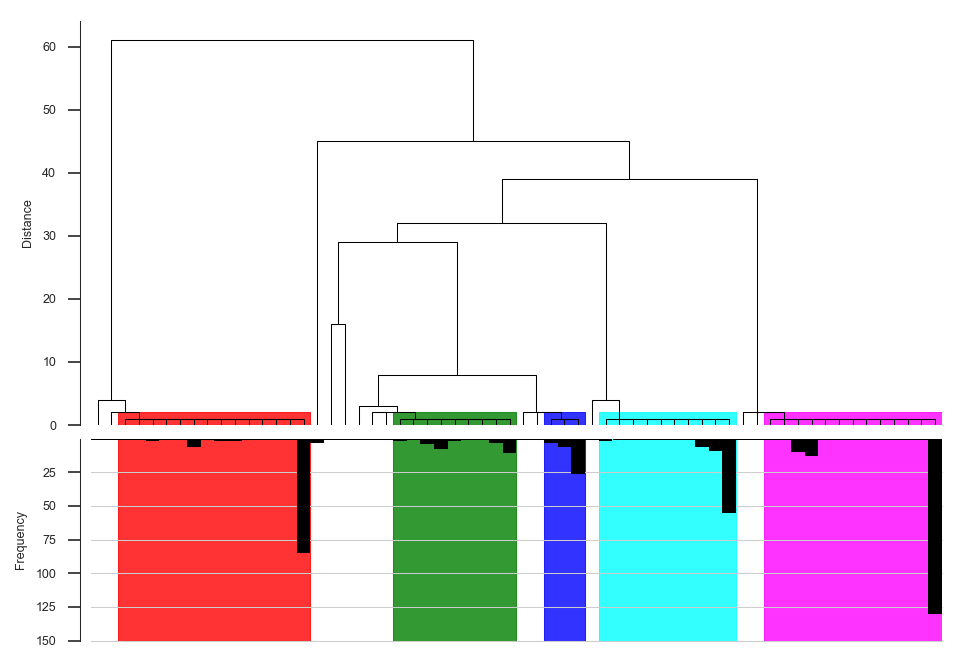

In [9]:
# Use your favourite colors...
fig_haplotypes_clustered(h_vgsc_995S, dpi=150, highlight_clusters=5, label_clusters=False, 
                         highlight_colors=['red', 'green', 'blue', 'cyan', 'magenta', 'yellow'],
                         highlight_alpha=.8);

## Return values

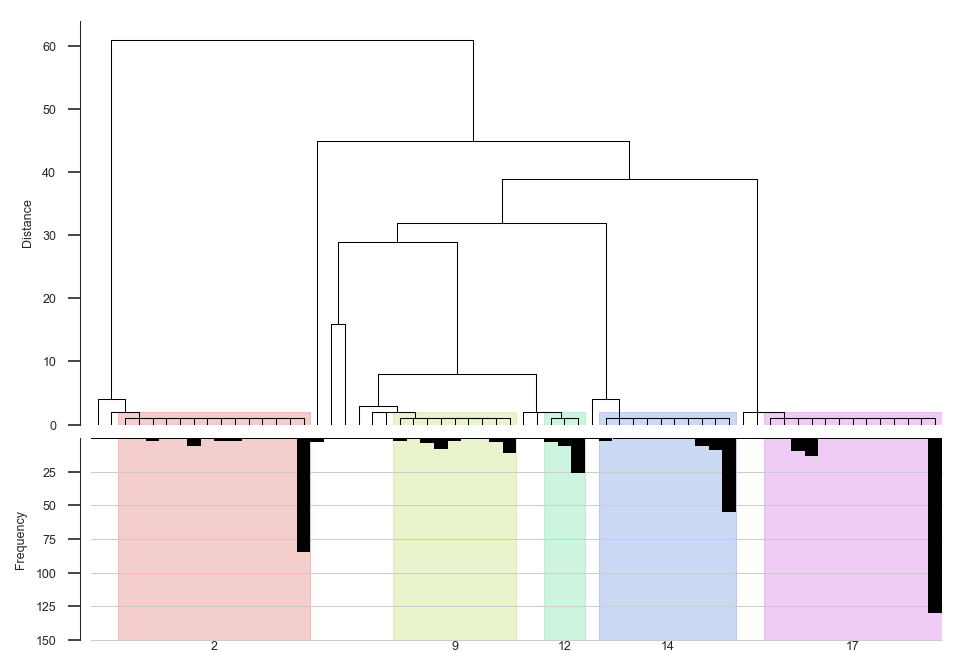

In [10]:
# What does this function return?
fig, ax_dend, ax_freq, cluster_spans = fig_haplotypes_clustered(h_vgsc_995S, dpi=150, highlight_clusters=5, label_clusters=5)

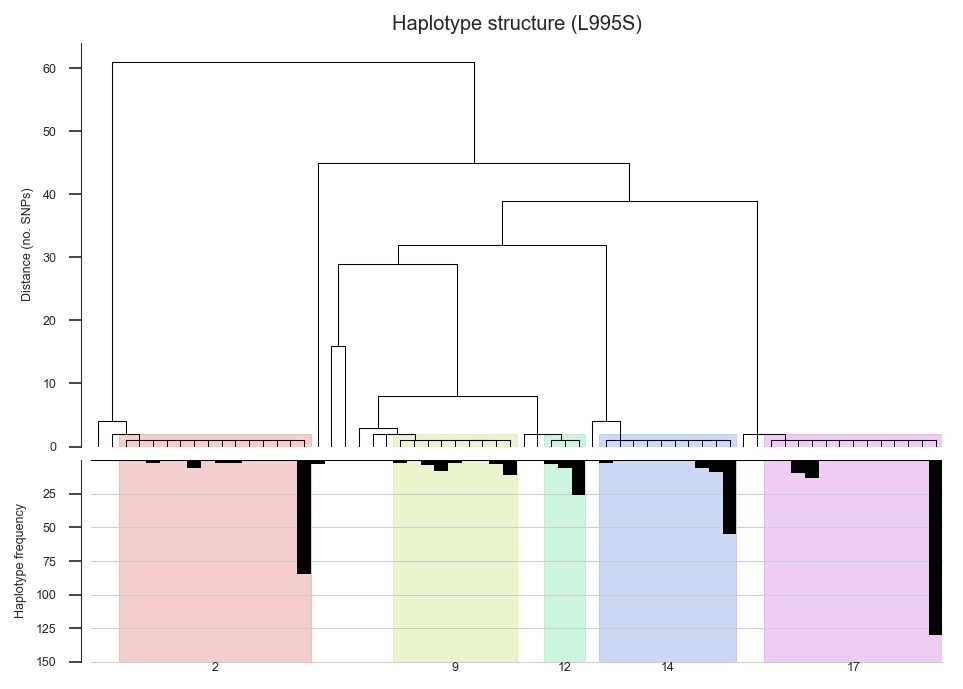

In [6]:
# E.g., customise axes...
fig, ax_dend, ax_freq, cluster_spans = fig_haplotypes_clustered(h_vgsc_995S, dpi=150, highlight_clusters=5, label_clusters=5)
ax_dend.set_title('Haplotype structure (L995S)')
ax_dend.set_ylabel('Distance (no. SNPs)')
ax_freq.set_ylabel('Haplotype frequency');

In [11]:
# Cluster spans is most useful...
cluster_spans

[(0, 1, array([85])),
 (1, 2, array([17])),
 (2,
  16,
  array([  0,   1,   3,   4,   5,   7,  11,  15,  16,  19,  21,  23,  25,
          28,  29,  33,  35,  36,  37,  38,  39,  40,  41,  42,  43,  45,
          47,  50,  51,  55,  57,  59,  61,  63,  64,  65,  71,  73,  75,
          77,  79,  82,  83,  86,  87,  88,  89,  91,  94,  95, 100, 101,
         103, 107, 109, 111, 114, 115, 119, 121, 122, 123, 126, 127, 128,
         129, 131, 133, 135, 137, 139, 140, 141, 144, 145, 147, 148, 149,
         151, 157, 158, 159, 163, 164, 165, 167, 169, 171, 172, 173, 176,
         177, 181, 183, 184, 185, 186, 187, 188, 189, 193, 195, 197, 199,
         201, 203])),
 (16, 17, array([277, 316, 346])),
 (17, 18, array([294])),
 (18, 19, array([369])),
 (19, 20, array([327])),
 (20, 21, array([278])),
 (21, 22, array([357])),
 (22,
  31,
  array([276, 282, 283, 284, 286, 287, 289, 291, 293, 299, 303, 304, 306,
         307, 311, 318, 320, 321, 322, 325, 326, 328, 330, 332, 336, 337,
         34

In [12]:
# E.g., cluster labelled "2" in the plot:
dend_start, dend_stop, hap_indices = cluster_spans[2]

In [13]:
# These are positions in the dendrogram where the cluster starts and stops:
dend_start, dend_stop

(2, 16)

In [14]:
# These are the indices of the haplotypes in the cluster
hap_indices

array([  0,   1,   3,   4,   5,   7,  11,  15,  16,  19,  21,  23,  25,
        28,  29,  33,  35,  36,  37,  38,  39,  40,  41,  42,  43,  45,
        47,  50,  51,  55,  57,  59,  61,  63,  64,  65,  71,  73,  75,
        77,  79,  82,  83,  86,  87,  88,  89,  91,  94,  95, 100, 101,
       103, 107, 109, 111, 114, 115, 119, 121, 122, 123, 126, 127, 128,
       129, 131, 133, 135, 137, 139, 140, 141, 144, 145, 147, 148, 149,
       151, 157, 158, 159, 163, 164, 165, 167, 169, 171, 172, 173, 176,
       177, 181, 183, 184, 185, 186, 187, 188, 189, 193, 195, 197, 199,
       201, 203])

In [15]:
# How many haplotypes in the cluster?
len(hap_indices)

106

In [16]:
# N.B., these are relative to the haplotype array passed into the function.
# To extract only haplotypes in this cluster...
haps_in_cluster = h_vgsc_995S.take(hap_indices, axis=1)
haps_in_cluster

<HaplotypeArray shape=(1718, 106) dtype=int8>
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0